In [1]:
#Este Notebook foi desenvolvido com o objetivo de comparar o desempenho dos campeos dos ultimos 5 campeonatos brasileiro de futebol

#Inicialmente, fiz a importacao dos pacotes que serao ncessaririos para desenvolvimento do estudo

import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt


A base de dados com as informacoes dos jogos foi extraida do site API-Football e salva em uma planilha excel.

Abaixo são realizados os comandos para importacao da planilha para este notebook, e tambem, são feitos alguns tratamentos nos campos da base a fim de facilitar a sua manipulação, que são eles:

- O campo de gols de penaltis foram preenchidos com zero nas partidas que nao houvera gols de penalidades

- Foi criado um campo com o resultado da partida para o time da casa e o visitante, isto e, se venceram ou perderam. A base ja possuia um campo informando o resultado, porem os valores estavam apenas como falso ou verdadeiro, e ao ser importado para o notebook vem com os valores 0 ou 1, com isso, substitui pelas letras D e V, para vitoria e derrota, a fim de facilitar a visualizacao, alem de incluir a letra E para empate, pois nesta condicao o campo de resultado ficava em branco.

- A base disponibilizada contem os jogos dos times em todos os campeonatos que participaram e tambem o jogos futuros, desta forma, como estamos interessados apenas nos jogos do campeonato brasileiro e que foram finalizados, realizei o corte na base para extrair as linhas que apresentam essas condicoes.

In [2]:
dados = pd.read_excel('e:/Desktop/Python/ECaso2/campeoes.xlsx',usecols = "A:Z")

dados['gols_casa_penalti']=dados['gols_casa_penalti'].fillna(0)
dados['gols_fora_penalti']=dados['gols_fora_penalti'].fillna(0)
dados['result_casa']= dados.casa_vence.replace({0.0:'D',1.0:'V'}).fillna('E')
dados['result_visit']= dados.fora_vence.replace({0.0:'D',1.0:'V'}).fillna('E')

jgs = dados.loc[(dados.partida_status=='Match Finished') & (dados.liga_id==71)]

jgs

,partida_id,data,estadio_id,estadio_nome,estadio_cidade,partida_status,liga_id,temporada,rodada,time_casa_id,...,time_casa_gols,time_fora_gols,gols_casa_1tempo,gols_fora_1tempo,gols_casa_jogo,gols_fora_jogo,gols_casa_penalti,gols_fora_penalti,result_casa,result_visit
14,837994,2022-04-10,258.0,Allianz Parque,"São Paulo, São Paulo",Match Finished,71,2022,Regular Season - 1,121,...,2.0,3.0,1.0,2.0,2.0,3.0,0.0,0.0,D,V
15,838008,2022-04-16,240.0,Estádio de Hailé Pinheiro,"Goiânia, Goiás",Match Finished,71,2022,Regular Season - 2,151,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,E,E
16,838014,2022-04-23,255.0,Arena Barueri,"Barueri, São Paulo",Match Finished,71,2022,Regular Season - 3,121,...,3.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,V,D
17,838022,2022-04-20,NaN,Estadio Jornalista Mário Filho,"Rio de Janeiro, Rio de Janeiro",Match Finished,71,2022,Regular Season - 4,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,E
18,838034,2022-05-08,258.0,Allianz Parque,"São Paulo, São Paulo",Match Finished,71,2022,Regular Season - 5,121,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,E,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,37508,2018-11-14,NaN,Allianz Parque,Sao Paulo,Match Finished,71,2018,Regular Season - 34,121,...,3.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,V,D
308,37519,2018-11-18,NaN,Durival Britto e Silva,Curitiba,Match Finished,71,2018,Regular Season - 35,122,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,E,E
309,37530,2018-11-21,NaN,Allianz Parque,Sao Paulo,Match Finished,71,2018,Regular Season - 36,121,...,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,V,D
310,37541,2018-11-25,NaN,São Januário,Rio de Janeiro,Match Finished,71,2018,Regular Season - 37,133,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,D,V


In [3]:
jogos = pd.DataFrame(jgs)
jogos.head()

,partida_id,data,estadio_id,estadio_nome,estadio_cidade,partida_status,liga_id,temporada,rodada,time_casa_id,...,time_casa_gols,time_fora_gols,gols_casa_1tempo,gols_fora_1tempo,gols_casa_jogo,gols_fora_jogo,gols_casa_penalti,gols_fora_penalti,result_casa,result_visit
14,837994,2022-04-10,258.0,Allianz Parque,"São Paulo, São Paulo",Match Finished,71,2022,Regular Season - 1,121,...,2.0,3.0,1.0,2.0,2.0,3.0,0.0,0.0,D,V
15,838008,2022-04-16,240.0,Estádio de Hailé Pinheiro,"Goiânia, Goiás",Match Finished,71,2022,Regular Season - 2,151,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,E,E
16,838014,2022-04-23,255.0,Arena Barueri,"Barueri, São Paulo",Match Finished,71,2022,Regular Season - 3,121,...,3.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,V,D
17,838022,2022-04-20,NaN,Estadio Jornalista Mário Filho,"Rio de Janeiro, Rio de Janeiro",Match Finished,71,2022,Regular Season - 4,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,E
18,838034,2022-05-08,258.0,Allianz Parque,"São Paulo, São Paulo",Match Finished,71,2022,Regular Season - 5,121,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,E,E


In [5]:
#Com as devidas classificacoes dos resultados das partidas, agora podemos criar um campo com as pontuacoes obtidas nos jogos
#tanto para os times da casa quanto para o visitantes.


def pontuacao (valor):
    if valor=='V':
        return 3
    elif valor =='D':
        return 0
    else:
        return 1
    

jogos['pts_casa']= jogos['result_casa'].apply(pontuacao)
jogos['pts_visit']= jogos['result_visit'].apply(pontuacao)

jogos.head()

,partida_id,data,estadio_id,estadio_nome,estadio_cidade,partida_status,liga_id,temporada,rodada,time_casa_id,...,gols_casa_jogo,gols_fora_jogo,gols_casa_penalti,gols_fora_penalti,result_casa,result_visit,gols_casa,gols_visit,pts_casa,pts_visit
14,837994,2022-04-10,258.0,Allianz Parque,"São Paulo, São Paulo",Match Finished,71,2022,Regular Season - 1,121,...,2.0,3.0,0.0,0.0,D,V,-1.0,1.0,0,3
15,838008,2022-04-16,240.0,Estádio de Hailé Pinheiro,"Goiânia, Goiás",Match Finished,71,2022,Regular Season - 2,151,...,1.0,1.0,0.0,0.0,E,E,0.0,0.0,1,1
16,838014,2022-04-23,255.0,Arena Barueri,"Barueri, São Paulo",Match Finished,71,2022,Regular Season - 3,121,...,3.0,0.0,0.0,0.0,V,D,3.0,-3.0,3,0
17,838022,2022-04-20,NaN,Estadio Jornalista Mário Filho,"Rio de Janeiro, Rio de Janeiro",Match Finished,71,2022,Regular Season - 4,127,...,0.0,0.0,0.0,0.0,E,E,0.0,0.0,1,1
18,838034,2022-05-08,258.0,Allianz Parque,"São Paulo, São Paulo",Match Finished,71,2022,Regular Season - 5,121,...,1.0,1.0,0.0,0.0,E,E,0.0,0.0,1,1


In [15]:
#Apos realizados os tratamentos necessarios para essa analise, foram extraidos os dados de jogos dos ultimos campeos brasileiros.
#Como os jogos dos times se alternam entre casa e visitante, tive de extrai-los separados para facilitar a manipulacao.



Palmeiras18 = pd.DataFrame(jogos.loc[(jogos.temporada==2018) & (jogos.time_casa_id==121)])
Palmeiras18F = pd.DataFrame(jogos.loc[(jogos.temporada==2018) & (jogos.time_fora_id==121)])  
Flamengo19 = pd.DataFrame(jogos.loc[(jogos.temporada==2019) & (jogos.time_casa_id==127)])
Flamengo19F = pd.DataFrame(jogos.loc[(jogos.temporada==2019) & (jogos.time_fora_id==127)]) 
Flamengo20 = pd.DataFrame(jogos.loc[(jogos.temporada==2020) & (jogos.time_casa_id==127)])
Flamengo20F = pd.DataFrame(jogos.loc[(jogos.temporada==2020) & (jogos.time_fora_id==127)]) 
Atletico21 = pd.DataFrame(jogos.loc[(jogos.temporada==2021) & (jogos.time_casa_id==1062)])
Atletico21F = pd.DataFrame(jogos.loc[(jogos.temporada==2021) & (jogos.time_fora_id==1062)])  
Palmeiras22 = pd.DataFrame(jogos.loc[(jogos.temporada==2022) & (jogos.time_casa_id==121)])
Palmeiras22F = pd.DataFrame(jogos.loc[(jogos.temporada==2022) & (jogos.time_fora_id==121)])  


In [16]:
#Para reduzir a quantidade de variaveis utilizadas na base, criei um outro DataFrame que contem apenas as colunas que iremos utiizar


Palmeiras = pd.DataFrame()
Palmeiras['data']= Palmeiras18['data'].loc[(jogos.time_casa_id== 121)]
Palmeiras['time'] = Palmeiras18['time_casa'].loc[(jogos.time_casa_id== 121)]
Palmeiras['result'] = Palmeiras18['result_casa'].loc[(jogos.time_casa_id== 121)]
Palmeiras['pts'] = Palmeiras18['pts_casa'].loc[(jogos.time_casa_id== 121)]

Flamengo = pd.DataFrame()
Flamengo['data']= Flamengo19['data'].loc[(jogos.time_casa_id== 127)]
Flamengo['time'] = Flamengo19['time_casa'].loc[(jogos.time_casa_id== 127)]
Flamengo['result'] = Flamengo19['result_casa'].loc[(jogos.time_casa_id== 127)]
Flamengo['pts'] = Flamengo19['pts_casa'].loc[(jogos.time_casa_id== 127)]

Flamengo2 = pd.DataFrame()
Flamengo2['data']= Flamengo20['data'].loc[(jogos.time_casa_id== 127)]
Flamengo2['time'] = Flamengo20['time_casa'].loc[(jogos.time_casa_id== 127)]
Flamengo2['result'] = Flamengo20['result_casa'].loc[(jogos.time_casa_id== 127)]
Flamengo2['pts'] = Flamengo20['pts_casa'].loc[(jogos.time_casa_id== 127)]

Atletico = pd.DataFrame()
Atletico['data']= Atletico21['data'].loc[(jogos.time_casa_id== 1062)]
Atletico['time'] = Atletico21['time_casa'].loc[(jogos.time_casa_id== 1062)]
Atletico['result'] = Atletico21['result_casa'].loc[(jogos.time_casa_id== 1062)]
Atletico['pts'] = Atletico21['pts_casa'].loc[(jogos.time_casa_id== 1062)]

Palmeiras2 = pd.DataFrame()
Palmeiras2['data']= Palmeiras22['data'].loc[(jogos.time_casa_id== 121)]
Palmeiras2['time'] = Palmeiras22['time_casa'].loc[(jogos.time_casa_id== 121)]
Palmeiras2['result'] = Palmeiras22['result_casa'].loc[(jogos.time_casa_id== 121)]
Palmeiras2['pts'] = Palmeiras22['pts_casa'].loc[(jogos.time_casa_id== 121)]

In [18]:
#Aqui, temos o mesmo procedimento realizado no trecho anterior, porem com os jogos realizados fora de casa por esses times

PalmeirasF = pd.DataFrame()
PalmeirasF['data']= Palmeiras18F['data'].loc[(jogos.time_fora_id== 121)]
PalmeirasF['time'] = Palmeiras18F['time_fora_nome'].loc[(jogos.time_fora_id== 121)]
PalmeirasF['result'] = Palmeiras18F['result_visit'].loc[(jogos.time_fora_id== 121)]
PalmeirasF['pts'] = Palmeiras18F['pts_visit'].loc[(jogos.time_fora_id== 121)]

FlamengoF = pd.DataFrame()
FlamengoF['data']= Flamengo19F['data'].loc[(jogos.time_fora_id== 127)]
FlamengoF['time'] = Flamengo19F['time_fora_nome'].loc[(jogos.time_fora_id== 127)]
FlamengoF['result'] = Flamengo19F['result_visit'].loc[(jogos.time_fora_id== 127)]
FlamengoF['pts'] = Flamengo19F['pts_visit'].loc[(jogos.time_fora_id== 127)]

Flamengo2F = pd.DataFrame()
Flamengo2F['data']= Flamengo20F['data'].loc[(jogos.time_fora_id== 127)]
Flamengo2F['time'] = Flamengo20F['time_fora_nome'].loc[(jogos.time_fora_id== 127)]
Flamengo2F['result'] = Flamengo20F['result_visit'].loc[(jogos.time_fora_id== 127)]
Flamengo2F['pts'] = Flamengo20F['pts_visit'].loc[(jogos.time_fora_id== 127)]

AtleticoF = pd.DataFrame()
AtleticoF['data']= Atletico21F['data'].loc[(jogos.time_fora_id== 1062)]
AtleticoF['time'] = Atletico21F['time_fora_nome'].loc[(jogos.time_fora_id== 1062)]
AtleticoF['result'] = Atletico21F['result_visit'].loc[(jogos.time_fora_id== 1062)]
AtleticoF['pts'] = Atletico21F['pts_visit'].loc[(jogos.time_fora_id== 1062)]

Palmeiras2F = pd.DataFrame()
Palmeiras2F['data']= Palmeiras22F['data'].loc[(jogos.time_fora_id== 121)]
Palmeiras2F['time'] = Palmeiras22F['time_fora_nome'].loc[(jogos.time_fora_id== 121)]
Palmeiras2F['result'] = Palmeiras22F['result_visit'].loc[(jogos.time_fora_id== 121)]
Palmeiras2F['pts'] = Palmeiras22F['pts_visit'].loc[(jogos.time_fora_id== 121)]

In [20]:
#Agora que temos as informacoes necessarias, podemos unir os dois DataFrames por time, deixando todas partidas, casa e visitante, no mesmo
#DataFrame

PartidasP18=Palmeiras.append(PalmeirasF).sort_values(by=['data'], ignore_index=False)
PartidasF19=Flamengo.append(FlamengoF).sort_values(by=['data'], ignore_index=False)
PartidasF20=Flamengo2.append(Flamengo2F).sort_values(by=['data'], ignore_index=False)
PartidasA21=Atletico.append(AtleticoF).sort_values(by=['data'], ignore_index=False)
PartidasP22=Palmeiras2.append(Palmeiras2F).sort_values(by=['data'], ignore_index=False)


In [22]:
#Visto que temos a pontuacao obtida pelos times em cada partida, podemos construir uma visao acumulada dessa potuacao por partida
#Calculo foi realizado utilizando a funcao expandig, a qual aplica uma funcao, que neste caso e soma, ao longo do tempo.

PartidasP18['pts_total'] = PartidasP18['pts'].expanding(1).sum()
PartidasF19['pts_total'] = PartidasF19['pts'].expanding(1).sum()
PartidasF20['pts_total'] = PartidasF20['pts'].expanding(1).sum()
PartidasA21['pts_total'] = PartidasA21['pts'].expanding(1).sum()
PartidasP22['pts_total'] = PartidasP22['pts'].expanding(1).sum()


#Indice definido para visualizacao das rodadas.

PartidasP18.index= range(1,39)
PartidasF19.index= range(1,39)
PartidasF20.index= range(1,39)
PartidasA21.index= range(1,39)
PartidasP22.index= range(1,32)


In [24]:

PartidasP18['rodada']=PartidasP18.index
PartidasF19['rodada']=PartidasF19.index
PartidasF20['rodada']=PartidasF20.index
PartidasA21['rodada']=PartidasA21.index
PartidasP22['rodada']=PartidasP22.index

In [28]:
PartidasF20

,data,time,result,pts,pts_total,rodada
1,2020-08-09,Flamengo,D,0,0.0,1
2,2020-08-12,Flamengo,D,0,0.0,2
3,2020-08-15,Flamengo,V,3,3.0,3
4,2020-08-19,Flamengo,E,1,4.0,4
5,2020-08-23,Flamengo,E,1,5.0,5
6,2020-08-30,Flamengo,V,3,8.0,6
7,2020-09-02,Flamengo,V,3,11.0,7
8,2020-09-05,Flamengo,V,3,14.0,8
9,2020-09-10,Flamengo,V,3,17.0,9
10,2020-09-13,Flamengo,D,0,17.0,10


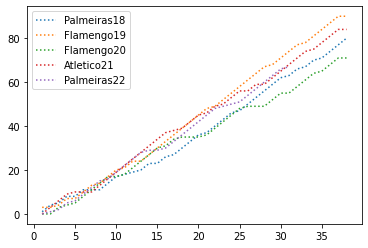

In [25]:
#Nos trechos anteriores foi possivel construir uma tabela com a pontuacao dos times nos anos em que foram campeos. Desta forma,
#agora conseguimos construir um grafico de linha comparando esses desempenhos.


plt.plot(PartidasP18['rodada'],PartidasP18['pts_total'], label= "Palmeiras18",linestyle=":")
plt.plot(PartidasF19['rodada'],PartidasF19['pts_total'], label = "Flamengo19",linestyle=":")
plt.plot(PartidasF20['rodada'],PartidasF20['pts_total'],label="Flamengo20",linestyle=":")
plt.plot(PartidasA21['rodada'],PartidasA21['pts_total'],label="Atletico21",linestyle=":")
plt.plot(PartidasP22['rodada'],PartidasP22['pts_total'],label="Palmeiras22",linestyle=":")
plt.legend()